In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime
from statistics import mode
from mpl_toolkits.basemap import Basemap

#%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

In [76]:
# opening CSV file
water_advisory_df=pd.read_csv('water_advisory_map_data_2022_11_17.csv')
water_advisory_df

,ID,Region,First Nation,Water System Name,Type of advisory,Date Advisory Set,Long term advisory since,Date Advisory Lifted,EPHO recommendation to lift,Project Phase,Population,Corrective Measure,Longitude,Latitude
0,1711,ATLANTIC,Abegweit,Morell Public Water System,Boil water advisory,2009-04-29,2010-04-29,2015-11-17,NaN,Complete,0 to 100 people,New water treatment system\r\n,-62.90262,46.357930
1,1712,ATLANTIC,Abegweit,Rocky Point Public Water System,Boil water advisory,2008-01-10,2009-01-10,2015-11-20,NaN,Complete,0 to 100 people,New water treatment system,-62.90262,46.357930
2,1713,ATLANTIC,Indian Island,Indian Island Band Office/Health Centre Semi-P...,Boil water advisory,2005-04-07,2006-04-07,2016-07-08,NaN,Complete,Unknown,Water system improvements,-64.79117,46.689380
3,1824,ONTARIO,Chippewas of Nawash First Nation,Cape Croker Public Water System,Boil water advisory,2019-01-21,2020-01-21,NaN,NaN,Construction,501 to 1000 people,New treatment plant\r\n,-81.01530,44.947100
4,1642,ONTARIO,Big Grassy,Big Grassy Public Water System,Boil water advisory,2017-03-01,2018-03-01,2019-04-17,NaN,Complete,101 to 500 people,Maintenance and repairs\r\n,-94.32186,49.065830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1708,BRITISH COLUMBIA,Wet'suwet'en First Nation,Palling Community Water System,Do not consume advisory,2012-03-13,2013-03-13,2021-03-18,NaN,Complete,51 to 100 people,Upgrades to treatment process and feasibility ...,-125.88823,54.330720
164,1717,QUEBEC,Kitigan Zibi Anishinabeg,Nicolas Stevens Center Semi-Public Water System,Do not consume advisory,1999-08-12,2000-08-12,2017-12-11,NaN,Complete,Unknown,Effective monitoring and sampling,-76.06362,46.363995
165,1718,QUEBEC,Kitigan Zibi Anishinabeg,Pakinawatik School Semi-Public Water System,Do not consume advisory,1999-08-12,2000-08-12,2017-12-11,NaN,Complete,Unknown,Effective monitoring and sampling,-76.06362,46.363995
166,1719,QUEBEC,Kitigan Zibi Anishinabeg,Wanaki Treatment Centre Semi-Public Water System,Do not consume advisory,1999-08-12,2000-08-12,2017-12-11,NaN,Complete,Unknown,Effective monitoring and sampling,-76.06362,46.363995


In [78]:
# cleaning the date columns
water_advisory_df['Date Advisory Set']=pd.to_datetime(df['Date Advisory Set'])
water_advisory_df['Date Advisory Lifted']=pd.to_datetime(df['Date Advisory Lifted'])

# removing NaN value from the type of advisory column
water_advisory_df=water_advisory_df[water_advisory_df['Type of advisory'].notna()]

water_advisory_df

/var/folders/xb/jsdnrww124zf5dldyly0tlnr0000gn/T/ipykernel_94673/131236364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_advisory_df['Date Advisory Set']=pd.to_datetime(df['Date Advisory Set'])
/var/folders/xb/jsdnrww124zf5dldyly0tlnr0000gn/T/ipykernel_94673/131236364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_advisory_df['Date Advisory Lifted']=pd.to_datetime(df['Date Advisory Lifted'])


,ID,Region,First Nation,Water System Name,Type of advisory,Date Advisory Set,Long term advisory since,Date Advisory Lifted,EPHO recommendation to lift,Project Phase,Population,Corrective Measure,Longitude,Latitude
0,1711,ATLANTIC,Abegweit,Morell Public Water System,Boil water advisory,2009-04-29,2010-04-29,2015-11-17,NaN,Complete,0 to 100 people,New water treatment system\r\n,-62.90262,46.357930
1,1712,ATLANTIC,Abegweit,Rocky Point Public Water System,Boil water advisory,2008-01-10,2009-01-10,2015-11-20,NaN,Complete,0 to 100 people,New water treatment system,-62.90262,46.357930
2,1713,ATLANTIC,Indian Island,Indian Island Band Office/Health Centre Semi-P...,Boil water advisory,2005-04-07,2006-04-07,2016-07-08,NaN,Complete,Unknown,Water system improvements,-64.79117,46.689380
3,1824,ONTARIO,Chippewas of Nawash First Nation,Cape Croker Public Water System,Boil water advisory,2019-01-21,2020-01-21,NaT,NaN,Construction,501 to 1000 people,New treatment plant\r\n,-81.01530,44.947100
4,1642,ONTARIO,Big Grassy,Big Grassy Public Water System,Boil water advisory,2017-03-01,2018-03-01,2019-04-17,NaN,Complete,101 to 500 people,Maintenance and repairs\r\n,-94.32186,49.065830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1769,BRITISH COLUMBIA,Nazko First Nation,Nazko Community Water System,Do not consume advisory,1999-01-01,2000-01-01,2015-11-20,NaN,Complete,0 to 50 people,New water treatment plant\r\n,-123.58066,52.941260
163,1708,BRITISH COLUMBIA,Wet'suwet'en First Nation,Palling Community Water System,Do not consume advisory,2012-03-13,2013-03-13,2021-03-18,NaN,Complete,51 to 100 people,Upgrades to treatment process and feasibility ...,-125.88823,54.330720
164,1717,QUEBEC,Kitigan Zibi Anishinabeg,Nicolas Stevens Center Semi-Public Water System,Do not consume advisory,1999-08-12,2000-08-12,2017-12-11,NaN,Complete,Unknown,Effective monitoring and sampling,-76.06362,46.363995
165,1718,QUEBEC,Kitigan Zibi Anishinabeg,Pakinawatik School Semi-Public Water System,Do not consume advisory,1999-08-12,2000-08-12,2017-12-11,NaN,Complete,Unknown,Effective monitoring and sampling,-76.06362,46.363995


In [79]:
# changing type of advisory column to numerical values for analysis purposes
water_advisory_df['Type of advisory']=water_advisory_df['Type of advisory'].replace('Boil water advisory', 1)
water_advisory_df['Type of advisory']=water_advisory_df['Type of advisory'].replace('Do not consume advisory', 2)
water_advisory_df

,ID,Region,First Nation,Water System Name,Type of advisory,Date Advisory Set,Long term advisory since,Date Advisory Lifted,EPHO recommendation to lift,Project Phase,Population,Corrective Measure,Longitude,Latitude
0,1711,ATLANTIC,Abegweit,Morell Public Water System,1,2009-04-29,2010-04-29,2015-11-17,NaN,Complete,0 to 100 people,New water treatment system\r\n,-62.90262,46.357930
1,1712,ATLANTIC,Abegweit,Rocky Point Public Water System,1,2008-01-10,2009-01-10,2015-11-20,NaN,Complete,0 to 100 people,New water treatment system,-62.90262,46.357930
2,1713,ATLANTIC,Indian Island,Indian Island Band Office/Health Centre Semi-P...,1,2005-04-07,2006-04-07,2016-07-08,NaN,Complete,Unknown,Water system improvements,-64.79117,46.689380
3,1824,ONTARIO,Chippewas of Nawash First Nation,Cape Croker Public Water System,1,2019-01-21,2020-01-21,NaT,NaN,Construction,501 to 1000 people,New treatment plant\r\n,-81.01530,44.947100
4,1642,ONTARIO,Big Grassy,Big Grassy Public Water System,1,2017-03-01,2018-03-01,2019-04-17,NaN,Complete,101 to 500 people,Maintenance and repairs\r\n,-94.32186,49.065830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1769,BRITISH COLUMBIA,Nazko First Nation,Nazko Community Water System,2,1999-01-01,2000-01-01,2015-11-20,NaN,Complete,0 to 50 people,New water treatment plant\r\n,-123.58066,52.941260
163,1708,BRITISH COLUMBIA,Wet'suwet'en First Nation,Palling Community Water System,2,2012-03-13,2013-03-13,2021-03-18,NaN,Complete,51 to 100 people,Upgrades to treatment process and feasibility ...,-125.88823,54.330720
164,1717,QUEBEC,Kitigan Zibi Anishinabeg,Nicolas Stevens Center Semi-Public Water System,2,1999-08-12,2000-08-12,2017-12-11,NaN,Complete,Unknown,Effective monitoring and sampling,-76.06362,46.363995
165,1718,QUEBEC,Kitigan Zibi Anishinabeg,Pakinawatik School Semi-Public Water System,2,1999-08-12,2000-08-12,2017-12-11,NaN,Complete,Unknown,Effective monitoring and sampling,-76.06362,46.363995


In [80]:
# merge the dataset with all water advisories with a dataset containing all reservations in Canada
reservation_df=pd.read_csv('Premiere_Nation_First_Nation.csv')

print(len(reservation_df['BAND_NAME'])) 

reservation_df = reservation_df.rename(columns={'LONGITUDE':'Longitude', 'LATITUDE':'Latitude'})
reservation_df['Type of advisory'] = 0

df_joined = pd.concat([water_advisory_df, reservation_df], ignore_index=True)

print(len(df_joined['Latitude']))
df_joined

637
805


,ID,Region,First Nation,Water System Name,Type of advisory,Date Advisory Set,Long term advisory since,Date Advisory Lifted,EPHO recommendation to lift,Project Phase,Population,Corrective Measure,Longitude,Latitude,BAND_NUMBER,BAND_NAME,COORD_SYS
0,1711,ATLANTIC,Abegweit,Morell Public Water System,Boil water advisory,2009-04-29,2010-04-29,2015-11-17,NaN,Complete,0 to 100 people,New water treatment system\r\n,-62.902620,46.357930,NaN,NaN,NaN
1,1712,ATLANTIC,Abegweit,Rocky Point Public Water System,Boil water advisory,2008-01-10,2009-01-10,2015-11-20,NaN,Complete,0 to 100 people,New water treatment system,-62.902620,46.357930,NaN,NaN,NaN
2,1713,ATLANTIC,Indian Island,Indian Island Band Office/Health Centre Semi-P...,Boil water advisory,2005-04-07,2006-04-07,2016-07-08,NaN,Complete,Unknown,Water system improvements,-64.791170,46.689380,NaN,NaN,NaN
3,1824,ONTARIO,Chippewas of Nawash First Nation,Cape Croker Public Water System,Boil water advisory,2019-01-21,2020-01-21,NaN,NaN,Construction,501 to 1000 people,New treatment plant\r\n,-81.015300,44.947100,NaN,NaN,NaN
4,1642,ONTARIO,Big Grassy,Big Grassy Public Water System,Boil water advisory,2017-03-01,2018-03-01,2019-04-17,NaN,Complete,101 to 500 people,Maintenance and repairs\r\n,-94.321860,49.065830,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-125.577923,64.900537,750.0,Tulita Dene,GCS_North_American_1983_CSRS
801,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-109.626874,54.408436,399.0,Big Island Lake Cree Nation,GCS_North_American_1983_CSRS
802,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.683575,52.215309,142.0,Albany,GCS_North_American_1983_CSRS
803,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.150200,46.536849,199.0,Garden River First Nation,GCS_North_American_1983_CSRS


In [7]:
# Grouping rows by coordinates, 
coordinates=df_joined.groupby(['Latitude', 'Longitude'])['Type of advisory'].mean().reset_index()
coordinates

,Latitude,Longitude,Type of advisory
0,42.052806,-82.597419,0.0
1,42.563979,-81.874366,0.0
2,42.591934,-82.493359,0.0
3,42.787992,-81.468301,0.0
4,42.818983,-81.473388,0.0
...,...,...,...
752,67.437452,-134.886044,0.0
753,67.441851,-133.743506,0.0
754,67.570390,-139.827822,0.0
755,68.218003,-135.020056,0.0


In [8]:
# creating a cmap for water advisory type colours
colours={'Colour':['#99d594', '#ed8826', '#d7191c'], 'Type of advisory':[0, 1, 2]}
colours_df = pd.DataFrame(colours)

water_colours=matplotlib.colors.LinearSegmentedColormap.from_list(colours_df['Type of advisory'],colours_df['Colour'])

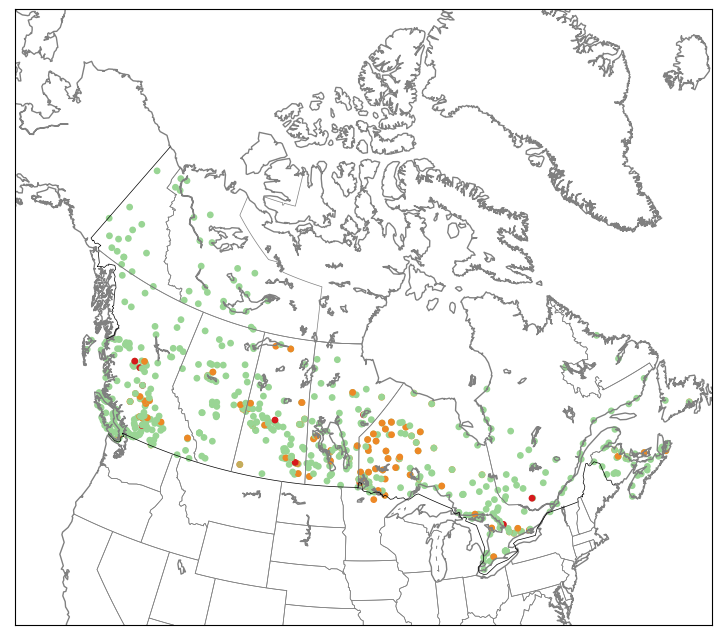

In [9]:
# create map plotting reservations and corresponding water advisory type
map = Basemap(projection='lcc', resolution='l', 
            lat_0=62.070, lon_0=-94.587, 
            width=6E6, height=5.3E6) 

map.drawcoastlines(color='gray')
map.drawcountries(color='black')
map.drawstates(color='gray')

map.scatter(
    coordinates['Longitude'],
    coordinates['Latitude'],
    latlon=True,
    c=coordinates['Type of advisory'],
    cmap=water_colours,
    vmin=0,
    vmax=2,
    s=15,
)
